In [2]:
import PyPDF2
import nltk
import spacy
#nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
import string
import re
import matplotlib.pyplot as plt

In [12]:
# define the class
class EarningsAnalysis:
    def __init__(self, pdf_path: str, company_name: str, quarter: str):
        # Validate company name
        if not company_name.islower():
            raise ValueError("Company name should be in lowercase.")
        self.company_name = company_name

        # Validate quarter format
        quarter_pattern = r"^Q[1-4]\d{2}$"
        if not re.match(quarter_pattern, quarter):
            raise ValueError("Quarter should be in the format Q[1,2,3,4]YY.")
        self.quarter = quarter
        self.stopwords_custom = [self.company_name, self.quarter, "officer", "analyst", "factset"]  # Define domain-specific stopwords
        self.stopwords = stopwords.words('english') + list(string.punctuation) + self.stopwords_custom
        self.pdf_path = pdf_path # save path to be used in text extraction
        self.transcript_text = self.extract_text_from_pdf()

    def extract_text_from_pdf(self):
        """
        This method extracts text from a PDF doc into a single stream of text.
        """
        text = ""
        with open(self.pdf_path, "rb") as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            for page_num in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_num]
                text += page.extract_text()
        return text

    def get_wordnet_pos(self, treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN  # Default to noun if POS tag is not recognized

    def preprocess_words(self, text: str):
        """
        This method breaks down the pdf text into tokens of words.
        """
        singles_removed = re.sub(r'\s+[a-zA-Z]\s', ' ', text)
        tokens = nltk.word_tokenize(singles_removed)
        clean_tokens = [token.lower() for token in tokens if token.isalnum()]
        stop_all = self.stopwords
        stop_removal = [stop for stop in clean_tokens if stop not in stop_all]
        pos_tokens = nltk.pos_tag(stop_removal)

        lemmatizer = nltk.WordNetLemmatizer()
        stems = []
        for t in pos_tokens:
            word = t[0]
            pos_type = t[1]
            wordnet_pos = self.get_wordnet_pos(pos_type)
            stems.append(lemmatizer.lemmatize(word, pos=wordnet_pos))
        return stop_removal, stems, pos_tokens

    def ngrams(self, tokens: list, num_ngrams: int):
        """
        This method extracts relevant keywords using n-grams.
        """
        ngrams = nltk.ngrams(tokens, num_ngrams)
        ngram_freq = nltk.FreqDist(ngrams)

        stop_all = self.stopwords
        
        keywords = [ngram for ngram in ngram_freq if ngram[0] not in stop_all and ngram[1] not in stop_all]
        return keywords, ngram_freq

    def word_frequency_dist(self, tokens: list):
        """Return the distribution of word frequencies in the text"""
        fdist = nltk.FreqDist(tokens)
        fdist.plot(30, cumulative=False, title="Top 30 Most Common Words")

    def preprocess_sentences(self, text: str):
        """
        This method breaks down the pdf text into tokens of sentences which is 
        more useful for later methods to provide context about topics discussed in the call.
        """
        #singles_removed = re.sub(r'\s+[a-zA-Z]\s', ' ', text)
        sentences = nltk.sent_tokenize(text)  # tokenize into sentences
        preprocessed_sentences = []

        for sentence in sentences:
            tokens = nltk.word_tokenize(sentence)  # tokenize each sentence into words
            clean_tokens = [token.lower() for token in tokens if token.isalnum()]  # remove non-alphanumeric tokens + lowercase
            stop_removal = [stop for stop in clean_tokens if stop not in self.stopwords]  # remove stopwords
            preprocessed_sentences.append(stop_removal)
        return preprocessed_sentences


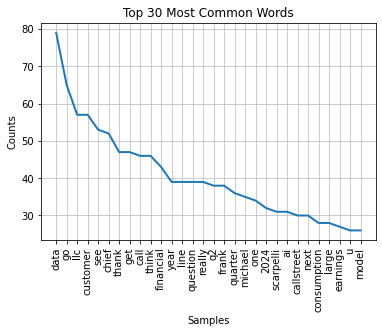

In [14]:
earnings_analysis = EarningsAnalysis("Data/SNOW_Q224.pdf", company_name='snowflake', quarter='Q224')
snowflake = earnings_analysis.transcript_text
#snowflake = earnings_analysis.extract_text_from_pdf("Data/SNOW_Q224.pdf")
removed_stopwords, word_stems, pos_tags = earnings_analysis.preprocess_words(snowflake)
ngram_keywords, ngram_freq = earnings_analysis.ngrams(removed_stopwords, 2)
sent_preprocessed = earnings_analysis.preprocess_sentences(snowflake)

In [ ]:
earnings_analysis.word_frequency_dist(word_stems)

In [107]:
ngram_freq

FreqDist({('scarpelli', 'chief'): 31, ('chief', 'financial'): 31, ('callstreet', 'llc'): 29, ('michael', 'scarpelli'): 29, ('2024', 'earnings'): 25, ('earnings', 'call'): 24, ('corrected', 'transcript'): 22, ('copyright', '2001'): 22, ('2001', 'callstreet'): 22, ('snow', 'q2'): 22, ...})

In [15]:
sent_preprocessed

[['corrected',
  'transcript',
  'total',
  'pages',
  '22',
  'copyright',
  '2001',
  'callstreet',
  'llc',
  'snow',
  'q2',
  '2024',
  'earnings',
  'call',
  'snow',
  'q2',
  '2024',
  'earnings',
  'call',
  'corrected',
  'transcript',
  '2',
  'copyright',
  '2001',
  'callstreet',
  'llc',
  'corporate',
  'participants',
  'jimmy',
  'sexton',
  'finance',
  'director',
  'head',
  'relations',
  'frank',
  'slootman',
  'chairman',
  'chief',
  'executive',
  'michael',
  'scarpelli',
  'chief',
  'financial',
  'christian',
  'kleinerman',
  'senior',
  'vice',
  'president',
  'participants',
  'keith',
  'weiss',
  'morgan',
  'stanley',
  'llc',
  'mark',
  'murphy',
  'jpmorgan',
  'securities',
  'llc',
  'kirk',
  'materne',
  'everco',
  'isi',
  'raimo',
  'lenschow',
  'barclays',
  'capital',
  'karl',
  'keirstead',
  'ubs',
  'securities',
  'llc',
  'kash',
  'rangan',
  'goldman',
  'sachs',
  'llc',
  'brad',
  'zelnick',
  'deutsche',
  'bank',
  'securit